In [71]:
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import spacy as sp
from sklearn.feature_extraction.text import CountVectorizer

In [119]:
# Download latest version
path = kagglehub.dataset_download("uciml/sms-spam-collection-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/uciml/sms-spam-collection-dataset/versions/1


In [120]:
data = pd.read_csv(path + "/spam.csv", encoding="ISO-8859-1")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [121]:
data["v2"] = data["v2"].str.replace("åÕ", "'")
data["v2"] = data["v2"].str.replace("&lt;","")
data["v2"] = data["v2"].str.replace("&gt;","")

# Dropping the redundent looking collumns (for this project)
to_drop = ["Unnamed: 2","Unnamed: 3","Unnamed: 4"]
data = data.drop(data[to_drop], axis=1)
# Renaming the columns because I feel fancy today 
data.rename(columns = {"v1":"class", "v2":"text"}, inplace = True)
data.iloc[44]["text"]

'Great! I hope you like your man well endowed. I am  #  inches...'

Text(0, 0.5, 'Number of Data points')

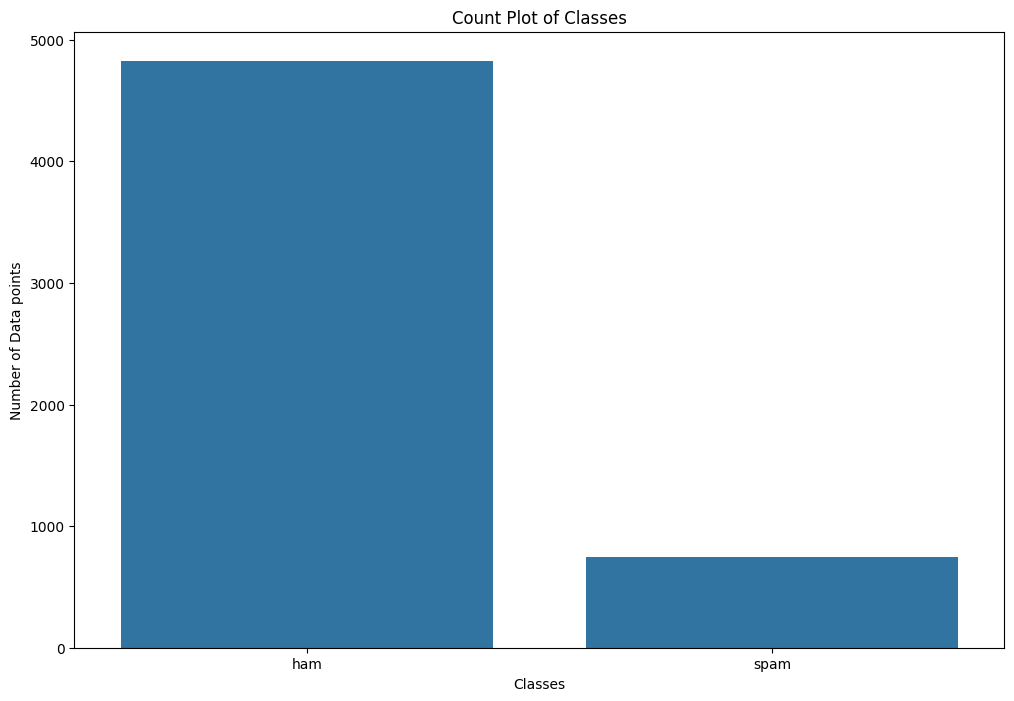

In [122]:
plt.figure(figsize=(12,8))
fg = sns.countplot(x= data["class"])
fg.set_title("Count Plot of Classes")
fg.set_xlabel("Classes")
fg.set_ylabel("Number of Data points")

In [123]:
NLP = sp.load("en_core_web_sm")

In [124]:
data["No_of_Characters"] = data["text"].apply(len)
data["No_of_Words"]=data.apply(lambda row: NLP(row["text"]), axis=1).apply(len)
data["No_of_sentence"]=data.apply(lambda row: list(NLP(row["text"]).sents), axis=1).apply(len)

<Figure size 1200x800 with 0 Axes>

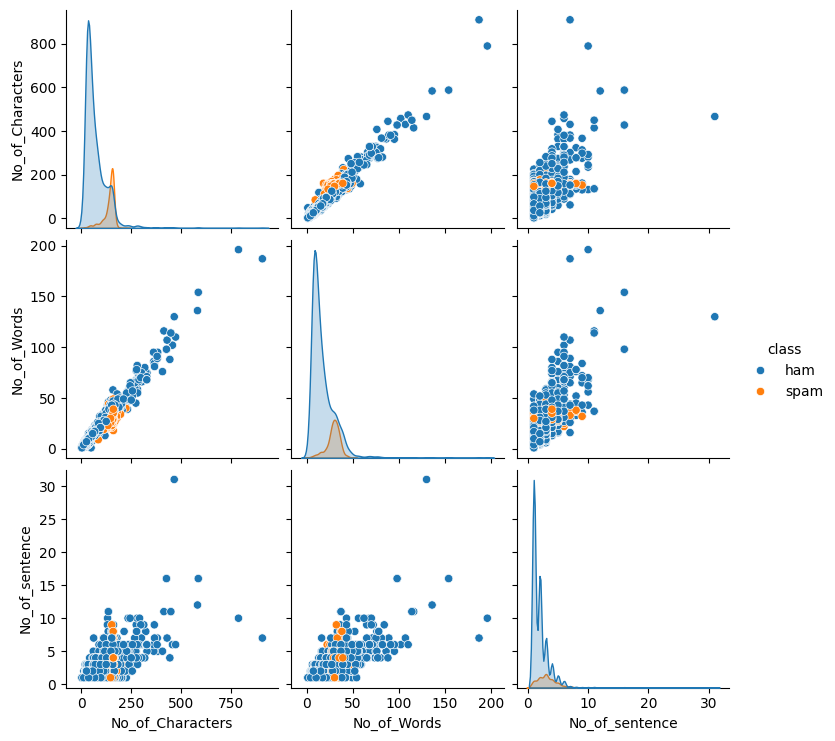

In [125]:
plt.figure(figsize=(12,8))
fg = sns.pairplot(data=data, hue="class")
plt.show(fg)

In [126]:
def clean_text(text):
    text = text.lower()
    return " ".join([token.lemma_ for token in NLP(text) if not token.is_stop ])

example = data["text"][0]
print("Original Text: ", example)
print("Cleaned Text: ", clean_text(example))
data["text_clean"] = data["text"].apply(clean_text)

Original Text:  Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Cleaned Text:  jurong point , crazy .. available bugis n great world la e buffet ... cine get amore wat ...


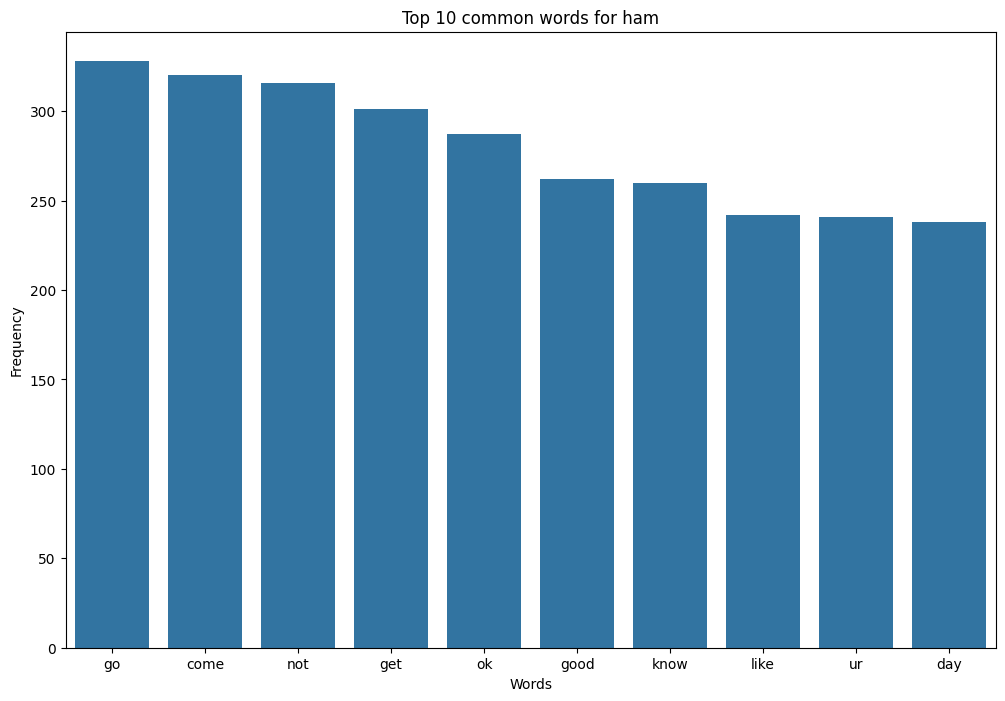

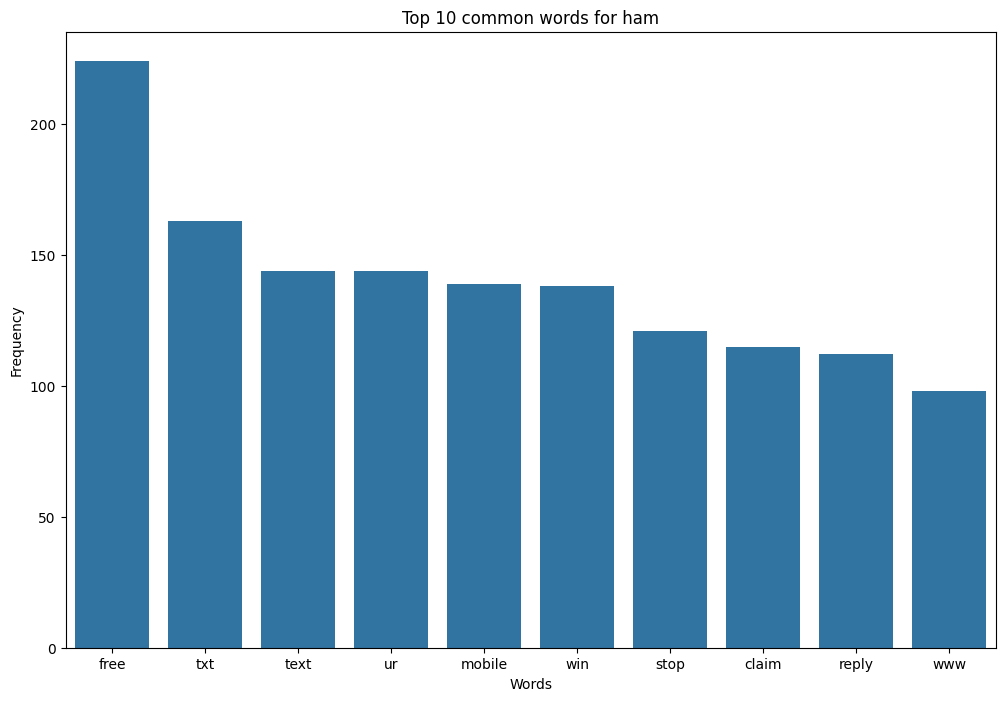

In [127]:
# plot most top 10 common words for ham 
vectorizer = CountVectorizer(ngram_range=(1,1))  # (1,1) for bigrams
X = vectorizer.fit_transform(data[data["class"] == "ham"]["text_clean"])
bigram_features = vectorizer.get_feature_names_out()
bigram_counts = X.toarray().sum(axis=0)
bigram_freq = sorted(zip(bigram_features, bigram_counts), key=lambda x: x[1], reverse=True)
top_10_bigrams = bigram_freq[:10]
plt.figure(figsize=(12,8))
fg = sns.barplot(x=[bigram[0] for bigram in top_10_bigrams], y=[bigram[1] for bigram in top_10_bigrams])
fg.set_title("Top 10 common words for ham")
fg.set_xlabel("Words")
fg.set_ylabel("Frequency")
plt.show(fg)

# plot most top 10 common words for spam 
vectorizer = CountVectorizer(ngram_range=(1,1))  # (1,1) for bigrams
X = vectorizer.fit_transform(data[data["class"] == "spam"]["text_clean"])
bigram_features = vectorizer.get_feature_names_out()
bigram_counts = X.toarray().sum(axis=0)
bigram_freq = sorted(zip(bigram_features, bigram_counts), key=lambda x: x[1], reverse=True)
top_10_bigrams = bigram_freq[:10]
plt.figure(figsize=(12,8))
fg = sns.barplot(x=[bigram[0] for bigram in top_10_bigrams], y=[bigram[1] for bigram in top_10_bigrams])
fg.set_title("Top 10 common words for ham")
fg.set_xlabel("Words")
fg.set_ylabel("Frequency")
plt.show(fg)

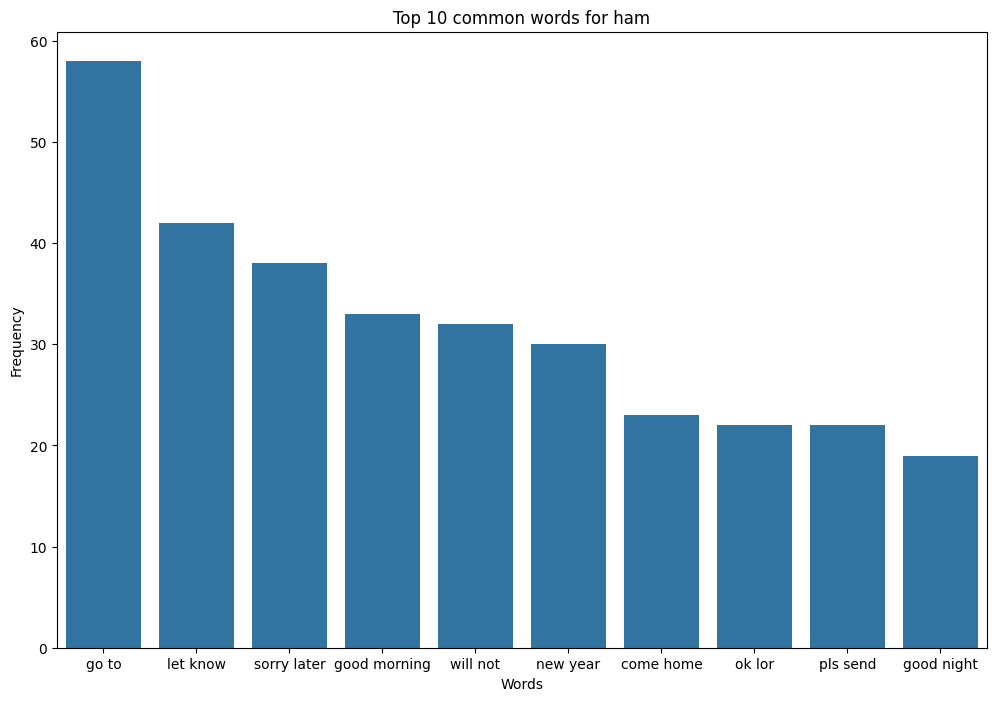

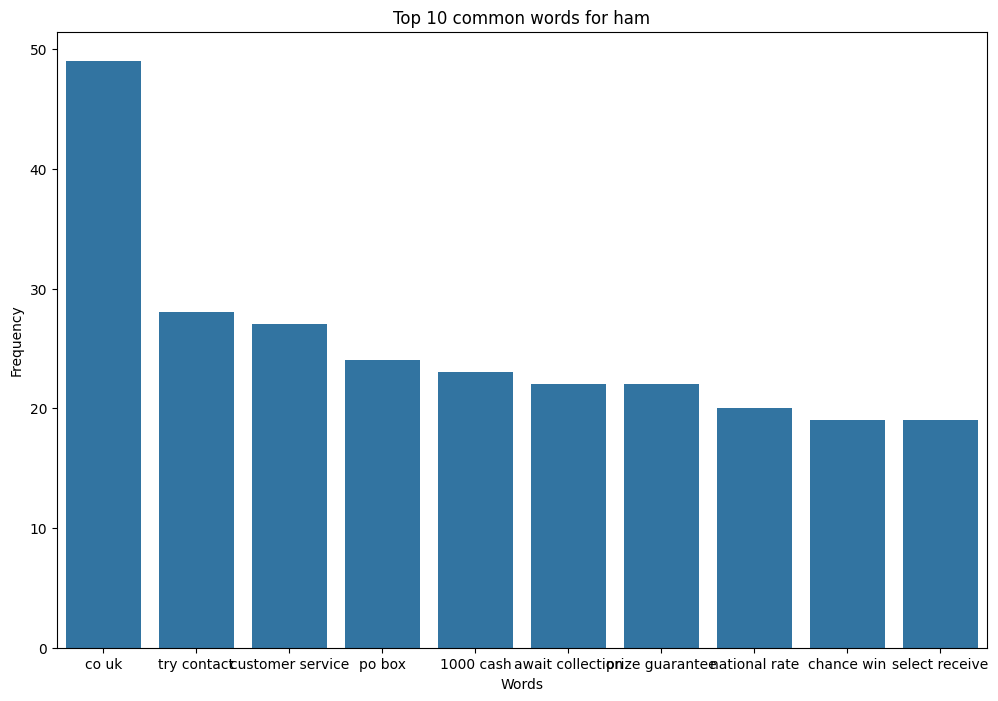

In [128]:
# plot most top 10 common words for ham 
vectorizer = CountVectorizer(ngram_range=(2, 2))  # (2, 2) for bigrams
X = vectorizer.fit_transform(data[data["class"] == "ham"]["text_clean"])
bigram_features = vectorizer.get_feature_names_out()
bigram_counts = X.toarray().sum(axis=0)
bigram_freq = sorted(zip(bigram_features, bigram_counts), key=lambda x: x[1], reverse=True)
top_10_bigrams = bigram_freq[:10]
plt.figure(figsize=(12,8))
fg = sns.barplot(x=[bigram[0] for bigram in top_10_bigrams], y=[bigram[1] for bigram in top_10_bigrams])
fg.set_title("Top 10 common words for ham")
fg.set_xlabel("Words")
fg.set_ylabel("Frequency")
plt.show(fg)

# plot most top 10 common words for spam 
vectorizer = CountVectorizer(ngram_range=(2, 2))  # (2, 2) for bigrams
X = vectorizer.fit_transform(data[data["class"] == "spam"]["text_clean"])
bigram_features = vectorizer.get_feature_names_out()
bigram_counts = X.toarray().sum(axis=0)
bigram_freq = sorted(zip(bigram_features, bigram_counts), key=lambda x: x[1], reverse=True)
top_10_bigrams = bigram_freq[:10]
plt.figure(figsize=(12,8))
fg = sns.barplot(x=[bigram[0] for bigram in top_10_bigrams], y=[bigram[1] for bigram in top_10_bigrams])
fg.set_title("Top 10 common words for ham")
fg.set_xlabel("Words")
fg.set_ylabel("Frequency")
plt.show(fg)